In [8]:
import pandas as pd
import numpy as np

In [9]:
data=pd.read_csv("airfoil_self_noise.dat",sep="\t")

In [10]:
data.columns=['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness',
              'Scaled sound pressure level']

In [11]:
data.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [12]:
## No null values so no need to manipulate this
data.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

In [13]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [14]:
## Do train test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [15]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
370,5000,5.3,0.2286,71.3,0.005194
920,400,15.4,0.0508,31.7,0.028985
466,16000,0.0,0.1524,71.3,0.001599
418,4000,7.3,0.2286,55.5,0.011171
300,800,4.0,0.2286,71.3,0.004006


In [16]:
import seaborn as sns

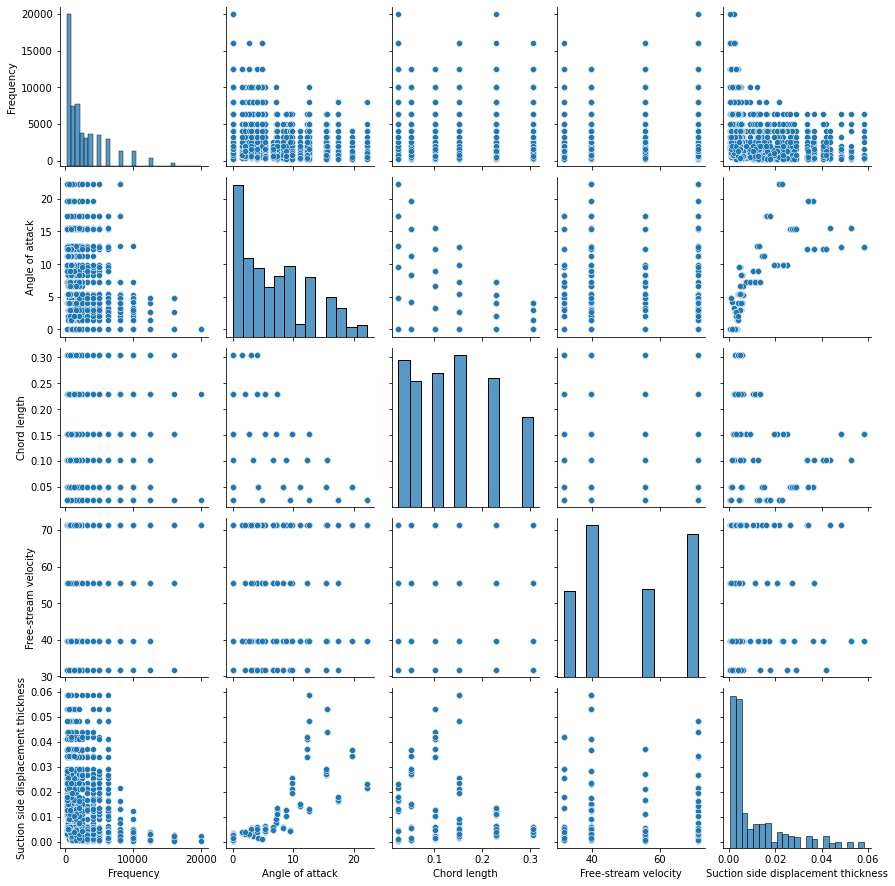

In [17]:
sns.pairplot(X_train)

In [18]:
data.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
Frequency,1.000000,-0.273429,-0.002871,0.134339,-0.230457,-0.390686
Angle of attack,-0.273429,1.000000,-0.504259,0.059822,0.753336,-0.156027
Chord length,-0.002871,-0.504259,1.000000,0.002217,-0.220338,-0.236657
Free-stream velocity,0.134339,0.059822,0.002217,1.000000,-0.003413,0.125003
Suction side displacement thickness,-0.230457,0.753336,-0.220338,-0.003413,1.000000,-0.312632
Scaled sound pressure level,-0.390686,-0.156027,-0.236657,0.125003,-0.312632,1.000000


In [19]:
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

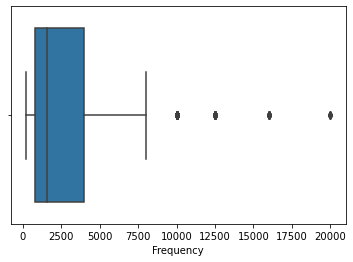

In [20]:
sns.boxplot(data['Frequency'])

Frequency has outliers

pandas profiling do automatic EDA

In [21]:
data['Scaled sound pressure level'].unique()

array([125.201, 125.951, 127.591, ..., 106.604, 106.224, 104.204])

In [22]:
len(data['Scaled sound pressure level'].unique())

1455

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scaled sound pressure level'>

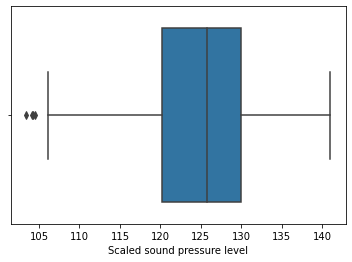

In [23]:
sns.boxplot(data['Scaled sound pressure level'])

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [25]:
Y_pred=regressor.predict(X_test)

In [26]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [27]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.5589292081837323

## Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
regressor=Ridge()

In [29]:
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-15,1e-10,1e-5,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}

In [30]:
ridge=GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridge.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [31]:
ridge.best_params_

{'alpha': 0.001}

In [32]:
ridge.best_score_

-24.40105834795572

In [33]:
Y_pred=ridge.predict(X_test)

In [34]:
r2_score(Y_test,Y_pred)

0.5588442566532243

## Lasso Regression

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [36]:
regressor=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-5,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
lasso=GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error',cv=5)

In [37]:
lasso.fit(X_train,Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10580.314672725108, tolerance: 4.300465666521223
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10519.733933981846, tolerance: 4.358979032717204
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10802.710979351148, tolerance: 4.270703703918758
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [38]:
lasso.best_params_

{'alpha': 1e-15}

In [39]:
lasso.best_score_

-24.401411421837356

In [40]:
Y_pred=lasso.predict(X_test)

In [41]:
r2_score(Y_test,Y_pred)

0.5589292081837314

## ElasticNet Regression

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
regressor=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-5,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
elasticnet=GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error',cv=5)
elasticnet.fit(X_train,Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9974.560080368607, tolerance: 4.300465666521223
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10782.641911221808, tolerance: 4.270703703918758
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10845.850262360147, tolerance: 4.602143315487014
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [44]:
elasticnet.best_params_

{'alpha': 1e-10}

In [45]:
elasticnet.best_score_

-24.401411390378378

In [46]:
Y_pred=elasticnet.predict(X_test)

In [47]:
r2_score(Y_test,Y_pred)

0.5589292035438029

## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [49]:
regressor.fit(X_train,Y_train)

DecisionTreeRegressor()

In [50]:
Y_pred=regressor.predict(X_test)

In [51]:
r2_score(Y_test,Y_pred)

0.880126011774574

## Support Vector Machine

In [52]:
from sklearn.svm import SVR
regressor=SVR()

In [53]:
regressor.fit(X_train,Y_train)

SVR()

In [54]:
Y_pred=regressor.predict(X_test)

In [55]:
r2_score(Y_pred,Y_test)

-2.158168877470715

In [56]:
regressor1=SVR(kernel='poly')
regressor1.fit(X_train,Y_train)
Y_pred=regressor1.predict(X_test)
r2_score(Y_test,Y_pred)

-0.029288478396140016

## Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [58]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [59]:
Y_pred=regressor.predict(X_test)

In [60]:
r2_score(Y_test,Y_pred)

0.9266942784301899

## Pickling the Best Model-Here Random Forest 

In [61]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [62]:
pickled_model=(pickle.load(open('model.pkl','rb')))

## Here we made prediction for batch input i.e. X_test
Y_pred=pickled_model.predict(X_test)

In [63]:
r2_score(Y_test,Y_pred)

0.9266942784301899

In [64]:
## It may happen that from frontend single input is passed
single_input={
    'Frequency':500,
    'Angle of attack':15.4,
    'Chord length':0.0508,
    'Free-stream velocity':31.7,
    'Suction side displacement thickness':0.028985
}

In [65]:
type(single_input.values())

dict_values

In [66]:
list(single_input.values())

[500, 15.4, 0.0508, 31.7, 0.028985]

In [73]:
## 2D input
[list(single_input.values())]

[[500, 15.4, 0.0508, 31.7, 0.028985]]

In [71]:
Y_pred=pickled_model.predict([list(single_input.values())])

array([123.99391])